In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
import pandas as pd

data = pd.read_csv('aggregated_election_table_2.csv')
data.head()

,type,candidates,partisan,level,mean gamma bf,std gamma bf,mean gamma mds,std gamma mds,mean bimodality,std bimodality,total number of elections
0,B,2,NO,1,1.000000,0.000000,1.000000,0.000000,0.884560,0.052221,25
1,B,3,NO,1,0.888488,0.051285,0.871529,0.055654,0.610200,0.158080,20
2,B,4,NO,1,0.738389,0.089478,0.720225,0.100971,0.443695,0.141449,15
3,B,5,NO,1,0.617422,0.116951,0.600826,0.138760,0.544040,0.207501,8
4,B,6,NO,1,0.672027,0.057777,0.706041,0.058585,0.310869,0.180564,5


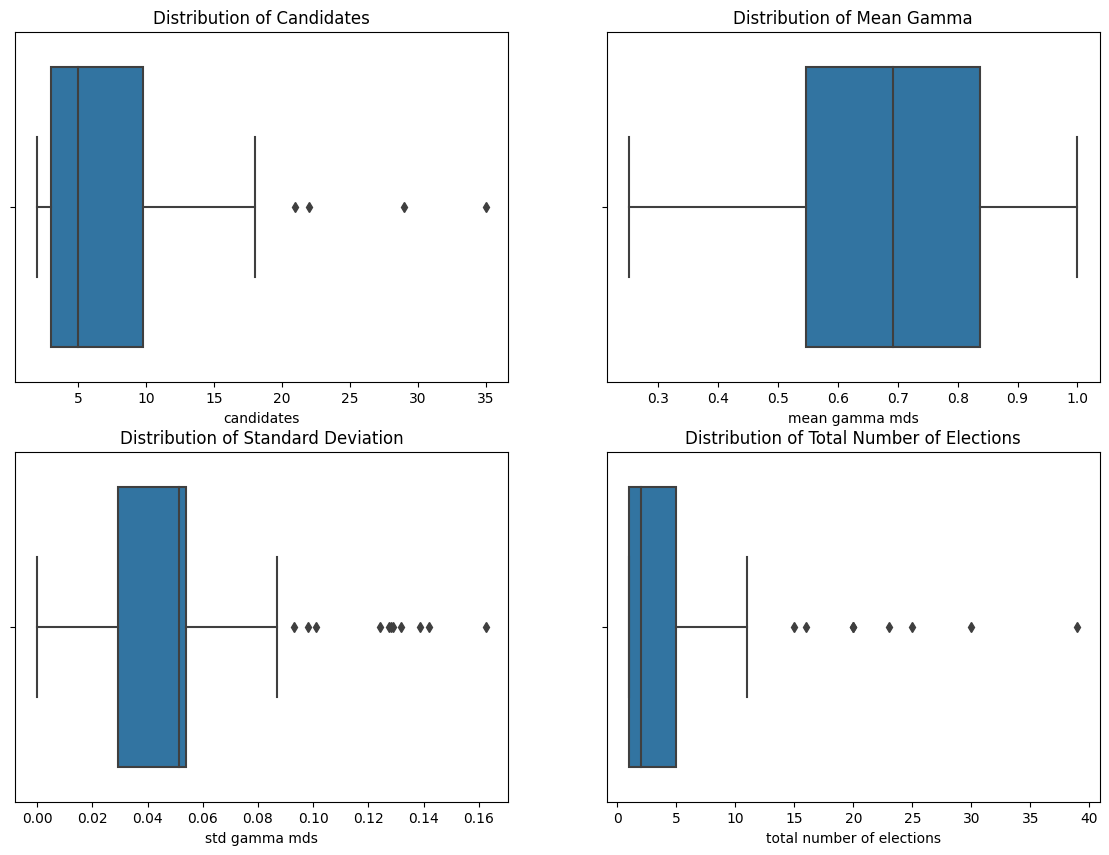

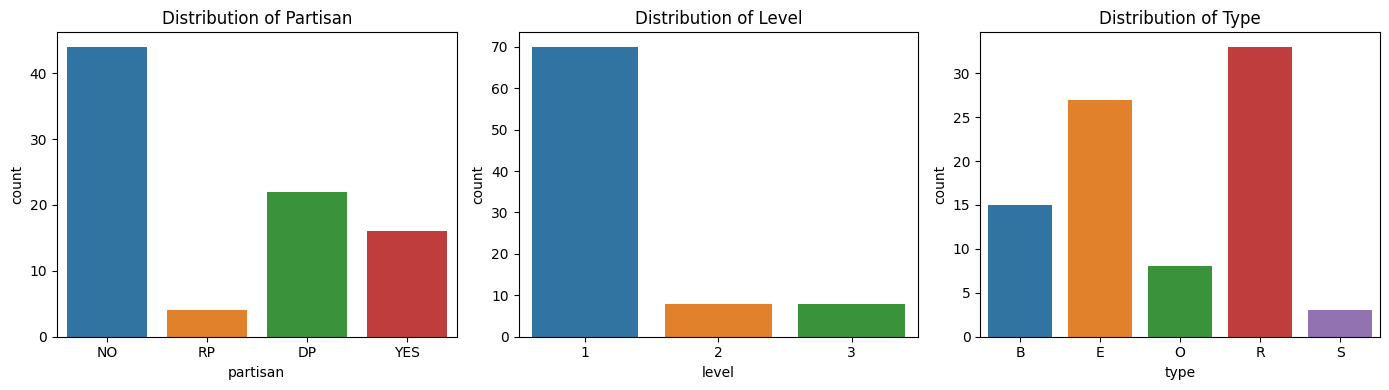

,type,candidates,partisan,level,mean gamma bf,std gamma bf,mean gamma mds,std gamma mds,mean bimodality,std bimodality,total number of elections
count,86,86.000000,86,86.000000,57.000000,39.000000,86.000000,86.000000,86.000000,50.000000,86.000000
unique,5,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,R,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,33,NaN,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.220930,NaN,1.279070,0.767539,0.048958,0.679378,0.051527,0.521030,0.136455,4.709302
std,NaN,5.879978,NaN,0.625933,0.184774,0.046041,0.199758,0.035541,0.245926,0.089108,6.863143
min,NaN,2.000000,NaN,1.000000,0.288009,0.000000,0.251224,0.000000,0.036211,0.013651,1.000000
25%,NaN,3.000000,NaN,1.000000,0.647729,0.002552,0.547379,0.029254,0.342937,0.062741,1.000000
50%,NaN,5.000000,NaN,1.000000,0.775978,0.035518,0.692281,0.051527,0.509892,0.139016,2.000000
75%,NaN,9.750000,NaN,1.000000,0.919168,0.088650,0.837017,0.053888,0.738798,0.177500,5.000000


In [24]:
# Drop the missing values in 'stdev' column with the mean of the non-missing values.
data['std gamma mds'].fillna(data['std gamma mds'].mean(), inplace=True)

# Drop the rows that have the value 'DP' and 'RP' in the 'partisan' column.
#data = data[data['partisan'] != 'DP']
#data = data[data['partisan'] != 'RP']

# Summary statistics for each variable
summary = data.describe(include='all')

# Boxplots to visualize the distribution of numeric variables
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x=data['candidates'], ax=axs[0, 0]).set_title('Distribution of Candidates')
sns.boxplot(x=data['mean gamma mds'], ax=axs[0, 1]).set_title('Distribution of Mean Gamma')
sns.boxplot(x=data['std gamma mds'], ax=axs[1, 0]).set_title('Distribution of Standard Deviation')
sns.boxplot(x=data['total number of elections'], ax=axs[1, 1]).set_title('Distribution of Total Number of Elections')

# Bar plots to visualize the distribution of categorical variables
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

sns.countplot(x=data['partisan'], ax=axs[0]).set_title('Distribution of Partisan')
sns.countplot(x=data['level'], ax=axs[1]).set_title('Distribution of Level')
sns.countplot(x=data['type'], ax=axs[2]).set_title('Distribution of Type')

plt.tight_layout()
plt.show()

summary

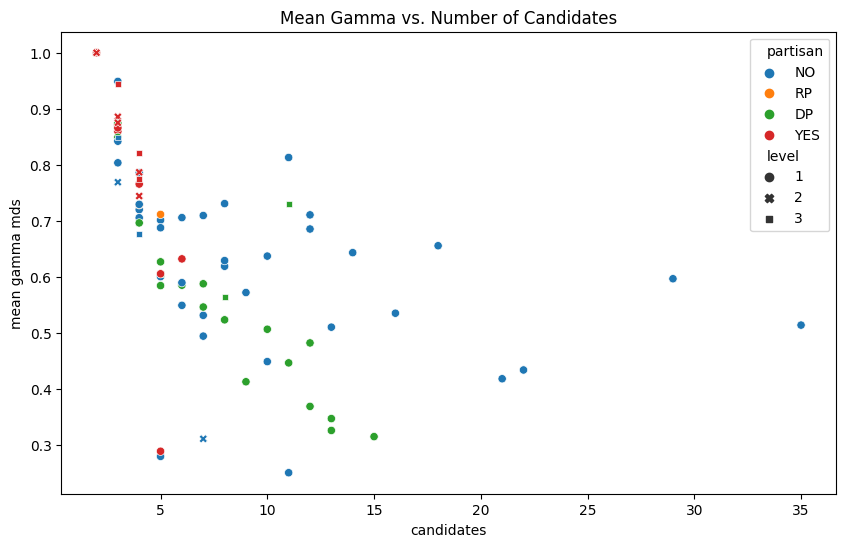

In [25]:
# Remove rows where the number of candidates is less than 2
filtered_data = data[data['candidates'] >= 2]

# Visualize the relationship between the number of candidates and mean gamma
plt.figure(figsize=(10, 6))
sns.scatterplot(x='candidates', y='mean gamma mds', hue='partisan', style='level', data=filtered_data)
plt.title('Mean Gamma vs. Number of Candidates')
plt.show()

<Figure size 1400x1000 with 0 Axes>

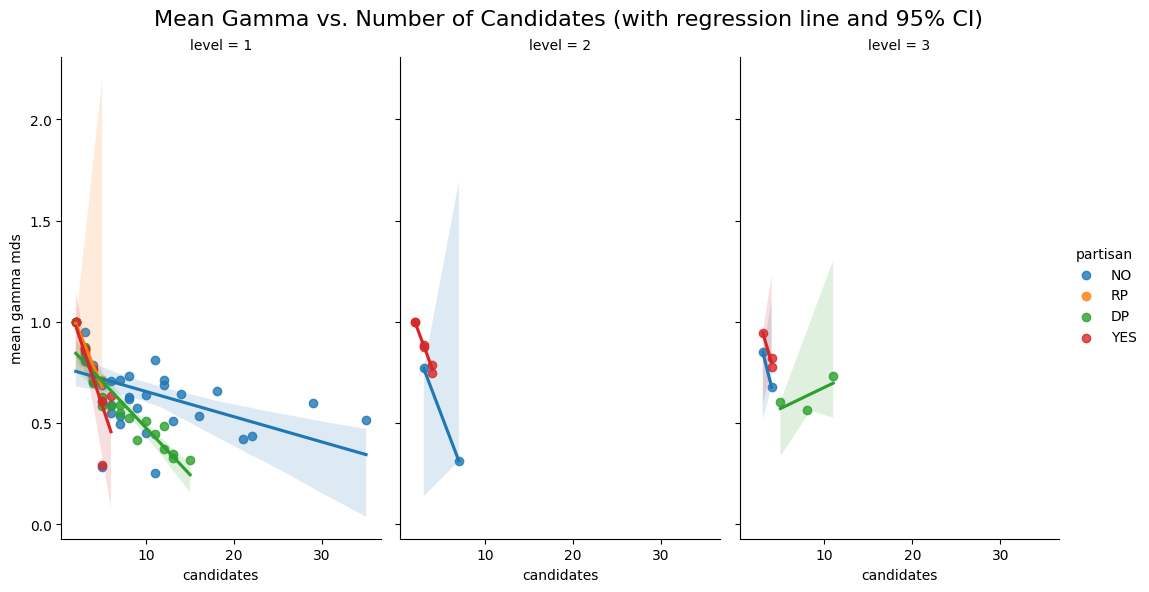

In [26]:
# Relationship between the number of candidates and mean gamma with a trend line for each category
plt.figure(figsize=(14, 10))

sns.lmplot(x='candidates', y='mean gamma mds', hue='partisan', col='level', data=filtered_data, ci=95, height=6, aspect=0.6)

plt.subplots_adjust(top=0.9)
plt.suptitle('Mean Gamma vs. Number of Candidates (with regression line and 95% CI)', fontsize=16)
plt.show()

In [27]:
filtered_data = filtered_data[[
    'type', 'candidates', 'partisan', 'level', 'mean gamma mds', 'std gamma mds', 'total number of elections']]

filtered_data.head()

,type,candidates,partisan,level,mean gamma mds,std gamma mds,total number of elections
0,B,2,NO,1,1.000000,0.000000,25
1,B,3,NO,1,0.871529,0.055654,20
2,B,4,NO,1,0.720225,0.100971,15
3,B,5,NO,1,0.600826,0.138760,8
4,B,6,NO,1,0.706041,0.058585,5


In [28]:
# Drop the first level of each categorical variable to prevent multicollinearity
data_encoded = pd.get_dummies(filtered_data, columns=['partisan', 'level', 'type'], drop_first=True)

data_encoded.head()

,candidates,mean gamma mds,std gamma mds,total number of elections,partisan_NO,partisan_RP,partisan_YES,level_2,level_3,type_E,type_O,type_R,type_S
0,2,1.000000,0.000000,25,True,False,False,False,False,False,False,False,False
1,3,0.871529,0.055654,20,True,False,False,False,False,False,False,False,False
2,4,0.720225,0.100971,15,True,False,False,False,False,False,False,False,False
3,5,0.600826,0.138760,8,True,False,False,False,False,False,False,False,False
4,6,0.706041,0.058585,5,True,False,False,False,False,False,False,False,False


In [29]:
# Construct the formula for the initial model
formula = 'Q("mean gamma mds") ~ candidates + ' + ' + '.join(data_encoded.columns.difference(['Unnamed: 0', 'candidates', 'mean gamma mds', 'std gamma mds', 'total number of elections']))

# Construct the formula with interaction terms
formula_interactions = formula + ' + candidates:partisan_NO + candidates:partisan_RP + candidates:partisan_YES + candidates:level_2 + candidates:level_3 + candidates:type_E + candidates:type_O + candidates:type_R + candidates:type_S'

# Fit the model with interaction terms
mixed_model_interactions = smf.ols(formula_interactions, data=data_encoded)
mixed_model_interactions_fit = mixed_model_interactions.fit()

# Show the model summary
mixed_model_interactions_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Q("mean gamma mds")   R-squared:                       0.654
Model:                             OLS   Adj. R-squared:                  0.555
Method:                  Least Squares   F-statistic:                     6.579
Date:                 Tue, 08 Aug 2023   Prob (F-statistic):           3.85e-09
Time:                         13:37:25   Log-Likelihood:                 62.684
No. Observations:                   86   AIC:                            -85.37
Df Residuals:                       66   BIC:                            -36.28
Df Model:                           19                                         
Covariance Type:             nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.8359      0.102      8.230      0.000       0.633       1.039
level_2[T.True]                     0.2777      0.168      1.656      0.102      -0.057       0.613
level_3[T.True]                    -0.0595      0.124     -0.480      0.633      -0.307       0.188
partisan_NO[T.True]                -0.0902      0.081     -1.109      0.272      -0.253       0.072
partisan_RP[T.True]                 0.3315      0.192      1.724      0.089      -0.052       0.715
partisan_YES[T.True]                0.3002      0.159      1.892      0.063      -0.017       0.617
type_E[T.True]                     -0.0116      0.079     -0.148      0.883      -0.169       0.145
type_O[T.True]                      0.2097      0.122      1.721      0.090      -0.034       0.453
type_R[T.True]                      0.0891      0.092      0.973      0.334      -0.094       0.272
type_S[T.True]                     -0.1668      0.368     -0.453      0.652      -0.902       0.568
candidates                         -0.0366      0.012     -3.177      0.002      -0.060      -0.014
candidates:partisan_NO[T.True]      0.0240      0.011      2.269      0.027       0.003       0.045
candidates:partisan_RP[T.True]     -0.0665      0.052     -1.280      0.205      -0.170       0.037
candidates:partisan_YES[T.True]    -0.0758      0.036     -2.082      0.041      -0.148      -0.003
candidates:level_2[T.True]         -0.0817      0.038     -2.170      0.034      -0.157      -0.007
candidates:level_3[T.True]          0.0198      0.021      0.961      0.340      -0.021       0.061
candidates:type_E[T.True]           0.0049      0.006      0.789      0.433      -0.007       0.017
candidates:type_O[T.True]          -0.0197      0.022     -0.906      0.368      -0.063       0.024
candidates:type_R[T.True]          -0.0103      0.011     -0.911      0.365      -0.033       0.012
candidates:type_S[T.True]           0.0705      0.110      0.638      0.526      -0.150       0.291
==============================================================================
Omnibus:                       13.712   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.795
Skew:                          -0.638   Prob(JB):                     1.85e-05
Kurtosis:                       5.110   Cond. No.                         345.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

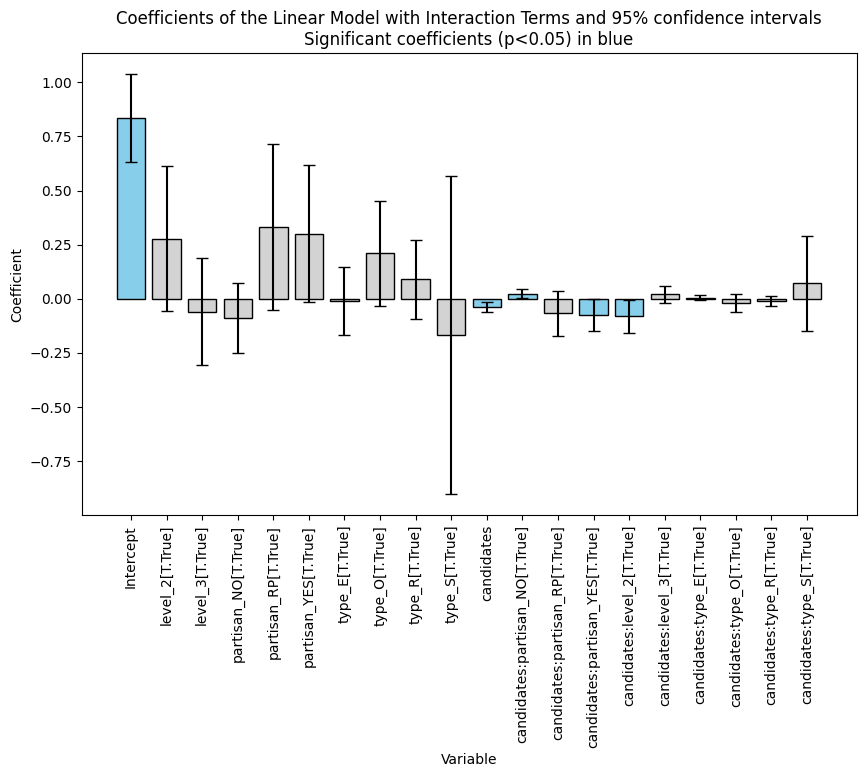

In [30]:
# Get the coefficients and their errors
coefficients_interactions = mixed_model_interactions_fit.params
errors_interactions = mixed_model_interactions_fit.bse

# Get the p-values from the model
p_values_interactions = mixed_model_interactions_fit.pvalues

# Create a new dataframe that includes coefficients, errors and p-values
df_interactions = pd.DataFrame({'coef': coefficients_interactions, 'err': errors_interactions, 'p_value': p_values_interactions})

# Create a new column in the dataframe to hold the colors for each bar
df_interactions['color'] = ['skyblue' if p < 0.05 else 'lightgray' for p in df_interactions['p_value']]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df_interactions.index, df_interactions['coef'], yerr=df_interactions['err']*2, capsize=4, color=df_interactions['color'], edgecolor='black')
plt.title('Coefficients of the Linear Model with Interaction Terms and 95% confidence intervals\nSignificant coefficients (p<0.05) in blue')
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.xticks(rotation=90)
plt.show()